In [1]:
# Import those libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import os
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from numpy import genfromtxt
import matplotlib.image as mpimg
import pandas as pd
import scipy
import time
from operator import add
from scipy.stats import binom
from numpy import random
from joblib import Parallel, delayed
import collections
import csv

## SEIR

In [2]:
def seir(params,x,popn):
    xdot = list(np.zeros(4))
    xdot[0] = -params[0]*x[0]*x[2]/popn - params[4]*x[0]   
    xdot[1] = params[0]*x[0]*x[2]/popn  - params[1]*x[1]  + params[3]*x[3]*x[2]/popn
    xdot[2] = params[1]*x[1] - params[2]*x[2]
    xdot[3] = params[2]*x[2] + params[4]*x[0] - params[3]*x[3]*x[2]/popn
    return xdot

In [3]:
def dynamics(x_init,days,params):
    x = x_init #Initial values for all towns!
    
    # Iterate over each day
    for day in range(days):
        xdot = seir(params, x[-1], popn)
        xdot = [i for i in xdot]
        x.append([sum(i) for i in zip(*[x[-1],xdot])])
    
    return x

In [4]:
def plotting(y):
    s = list(zip(*y))
    plt.figure(figsize = (6,6))
    plt.plot(s[0],'k', label ='Susceptible')
    plt.plot(s[1],'b', label = 'Exposed')
    plt.plot(s[2],'r', label = 'Infected')
    plt.plot(s[3],'y', label = 'Recovered/Vaccinated')
    plt.title('SEIR')
    plt.legend()
    plt.xlabel("Days")
    plt.ylabel("Number of infected")
    plt.xlim([0,365])
    plt.ylim([0,1])
    plt.tight_layout()

In [5]:
popn =1

In [6]:
# Call the function (just once)
y = dynamics([[0.99,0,0.01,0]],365, [1.5, 1/5.2, 1/12,0.5,0.0001])

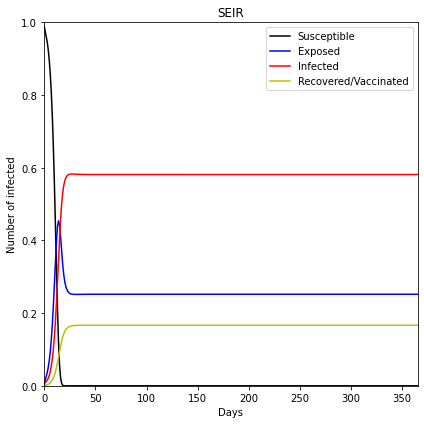

In [7]:
plotting(y)

## SIR

In [8]:
def sir(params,x,popn=1):
    xdot = list(np.zeros(3))
    xdot[0] = -params[0]*x[0]*x[1]/popn
    xdot[1] = params[0]*x[0]*x[1]/popn  - params[1]*x[1]
    xdot[2] = params[1]*x[1]
    return xdot

In [9]:
def dynamics(x_init,days,params,steps):
    x = x_init
    
    # Iterate over each day
    for day in range(days):
        for t in range(steps):
            xdot = sir(params, x[-1], popn=1)
            xdot = [i/steps for i in xdot]
            x.append([sum(i) for i in zip(*[x[-1],xdot])])
    
    return x

In [10]:
def plotting(y):
    s = list(zip(*y))
    plt.figure(figsize = (6,6))
    plt.plot(s[0],'b', label ='Susceptible')
    plt.plot(s[1],'r', label = 'Infected')
    plt.plot(s[2],'k', label = 'Removed')
    plt.legend()
    plt.xlabel("Days", fontsize = 15)
    plt.ylabel("Proportion of population", fontsize = 15)
    plt.xlim([0,10000])
    plt.ylim([-0.1,1.1])
    plt.tight_layout()

In [33]:
days = 35
steps = 5

In [34]:
# Call the function (just once)
y1 = dynamics([[0.999,0.001,0]],days, [0.8,1],steps)
y2 = dynamics([[0.999,0.001,0]],days, [1.3,1],steps)
y3 = dynamics([[0.999,0.001,0]],days, [2,1],steps)
y4 = dynamics([[0.999,0.001,0]],days, [3,1],steps)

In [35]:
x1 = list(zip(*y1))
x2 = list(zip(*y2))
x3 = list(zip(*y3))
x4 = list(zip(*y4))

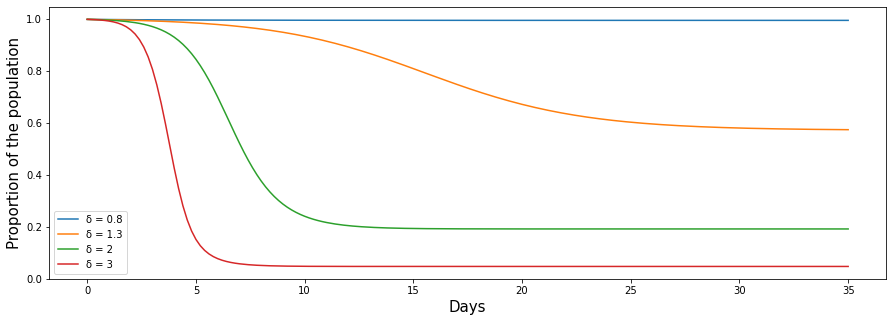

In [46]:
plt.figure(figsize = (15,5))
plt.plot([i/steps for i in range(days*steps+1)], x1[0], label = 'δ = 0.8')
plt.plot([i/steps for i in range(days*steps+1)], x2[0], label = 'δ = 1.3')
plt.plot([i/steps for i in range(days*steps+1)], x3[0], label = 'δ = 2')
plt.plot([i/steps for i in range(days*steps+1)], x4[0], label = 'δ = 3')
plt.ylabel('Proportion of the population', size = 15)
plt.xlabel('Days', size = 15)
plt.legend()

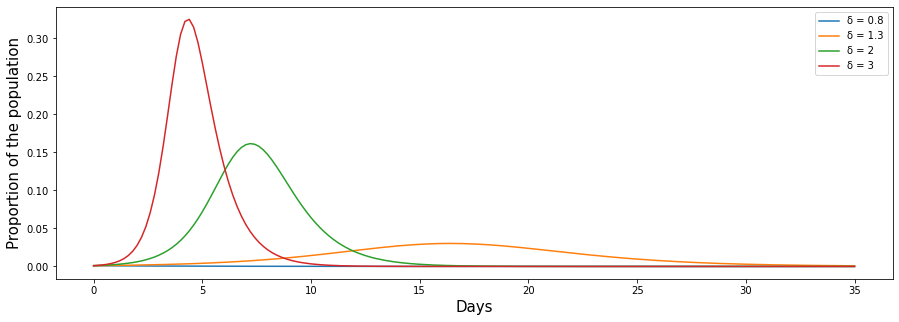

In [50]:
plt.figure(figsize = (15,5))
plt.plot([i/steps for i in range(days*steps+1)], x1[1], label = 'δ = 0.8')
plt.plot([i/steps for i in range(days*steps+1)], x2[1], label = 'δ = 1.3')
plt.plot([i/steps for i in range(days*steps+1)], x3[1], label = 'δ = 2')
plt.plot([i/steps for i in range(days*steps+1)], x4[1], label = 'δ = 3')
plt.ylabel('Proportion of the population', size = 15)
plt.xlabel('Days', size = 15)
plt.legend()

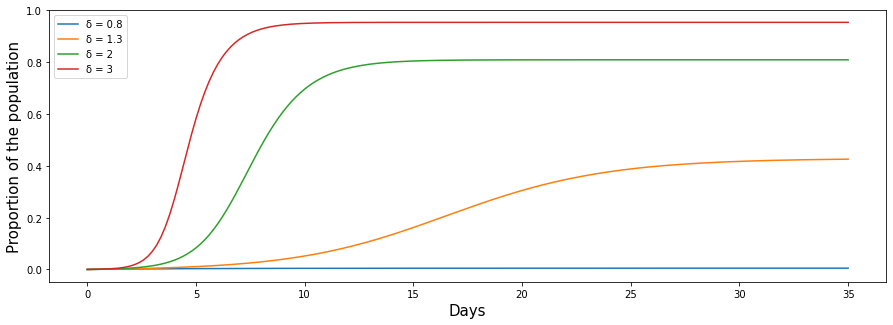

In [48]:
plt.figure(figsize = (15,5))
plt.plot([i/steps for i in range(days*steps+1)], x1[2], label = 'δ = 0.8')
plt.plot([i/steps for i in range(days*steps+1)], x2[2], label = 'δ = 1.3')
plt.plot([i/steps for i in range(days*steps+1)], x3[2], label = 'δ = 2')
plt.plot([i/steps for i in range(days*steps+1)], x4[2], label = 'δ = 3')
plt.ylabel('Proportion of the population', size = 15)
plt.xlabel('Days', size = 15)
plt.legend()